## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

import re
import string
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob

In [3]:
from google.colab import drive
drive.mount ('/content/drive') # loading data


Mounted at /content/drive


In [6]:
ppdata = pd.read_csv('/content/drive/MyDrive/Datasets/CopyofPPdataset.csv')

## Data Overview

In [7]:
ppdata.head()

,Age,Gender,Occupation,Monthly Income,low-carb,low-fat,high-protein,non-veg,veg,vegan,gluten-free,Lactose Intolerance,soy-allergy,wheat-allergy,fish-allergy,meal-preff,cuisine-preff
0,20,Female,Student,0,1,1,0,0,0,1,0,0,0,0,1,Lunch,Indian
1,24,Female,Student,<10000,1,1,1,0,1,0,0,0,1,0,0,Lunch,Indian
2,22,Male,Student,<10000,0,0,0,0,0,1,0,1,0,0,0,Breakfast,Indian
3,22,Female,Student,0,0,1,0,1,0,0,0,0,0,0,0,Dinner,Chinese
4,22,Male,Student,<10000,1,0,1,0,0,0,1,1,0,0,1,Dinner,Chinese


In [8]:
ppdata.info() # What are the datatypes of the different columns in the dataset?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  388 non-null    int64 
 1   Gender               388 non-null    object
 2   Occupation           388 non-null    object
 3   Monthly Income       388 non-null    object
 4   low-carb             388 non-null    int64 
 5   low-fat              388 non-null    int64 
 6   high-protein         388 non-null    int64 
 7   non-veg              388 non-null    int64 
 8   veg                  388 non-null    int64 
 9   vegan                388 non-null    int64 
 10  gluten-free          388 non-null    int64 
 11  Lactose Intolerance  388 non-null    int64 
 12  soy-allergy          388 non-null    int64 
 13  wheat-allergy        388 non-null    int64 
 14  fish-allergy         388 non-null    int64 
 15  meal-preff           388 non-null    object
 16  cuisine-

In [10]:
ppdata.shape #How many rows and columns are present in the data?

(388, 17)

In [11]:
ppdata.describe().T # Get the summary statistics of the numerical data?

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0,23.0,24.0,26.0,33.0
low-carb,388.0,0.484536,0.500406,0.0,0.0,0.0,1.0,1.0
low-fat,388.0,0.479381,0.500220,0.0,0.0,0.0,1.0,1.0
high-protein,388.0,0.505155,0.500619,0.0,0.0,1.0,1.0,1.0
non-veg,388.0,0.234536,0.424256,0.0,0.0,0.0,0.0,1.0
veg,388.0,0.255155,0.436511,0.0,0.0,0.0,1.0,1.0
vegan,388.0,0.237113,0.425862,0.0,0.0,0.0,0.0,1.0
gluten-free,388.0,0.273196,0.446176,0.0,0.0,0.0,1.0,1.0
Lactose Intolerance,388.0,0.231959,0.422628,0.0,0.0,0.0,0.0,1.0
soy-allergy,388.0,0.257732,0.437950,0.0,0.0,0.0,1.0,1.0


In [15]:
(ppdata.isnull().sum() / len(ppdata)) * 100 # missing values

Age                    0.0
Gender                 0.0
Occupation             0.0
Monthly Income         0.0
low-carb               0.0
low-fat                0.0
high-protein           0.0
non-veg                0.0
veg                    0.0
vegan                  0.0
gluten-free            0.0
Lactose Intolerance    0.0
soy-allergy            0.0
wheat-allergy          0.0
fish-allergy           0.0
meal-preff             0.0
cuisine-preff          0.0
dtype: float64

In [13]:
# write your code here
duplicates = ppdata.duplicated()

print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
383    False
384    False
385    False
386    False
387    False
Length: 388, dtype: bool


In [ ]:
ppdata['Allergies'].value_counts(dropna=False)


NaN                                   42
Milk allergy / Lactose intolerance    30
Legume Allergy                        28
Oral Allergy Syndrome                 26
Fish Allergy                          24
Cruciferous Allergy                   19
Stone Fruit Allergy                   16
Hypersensitivity                      15
Poultry Allergy                       15
Seed Allergy                          15
Alpha-gal Syndrome                    12
Nut Allergy                           12
Allium Allergy                        11
Citrus Allergy                        10
Potato Allergy                        10
Histamine Allergy                     10
Sugar Allergy / Intolerance            9
Insulin Allergy                        9
Salicylate Allergy                     9
Honey Allergy                          8
Corn Allergy                           6
Gluten Allergy                         6
Nightshade Allergy                     5
Ochratoxin Allergy                     5
LTP Allergy     

In [ ]:
ppdata['Perference(P1)'].value_counts(dropna=False)

Non Veg foods (Lunch / Dinner)            315
Veg foods (Breakfast / Lunch / Dinner)     69
Sweets                                      3
Bakery items (snacks)                       1
Name: Perference(P1), dtype: int64

In [ ]:
ppdata['Perference(P2)'].value_counts(dropna=False)

 Veg foods (Breakfast / Lunch / Dinner)    294
 Sweets                                     46
 Ice cream / Cool drinks                    35
 Bakery items (snacks)                      13
Name: Perference(P2), dtype: int64

In [ ]:
ppdata['Health Concern'].value_counts(dropna=False)

Agree                121
Disagree             119
Neutral               68
Strongly agree        67
Strongly disagree     13
Name: Health Concern, dtype: int64

## EDA

In [19]:
percentage_missing_allergies = (ppdata['meal-preff'].isnull().sum() / len(ppdata)) * 100
print(f"Percentage of missing values in Meal Preferences: {percentage_missing_allergies:.2f}%")


Percentage of missing values in Meal Preferences: 0.00%


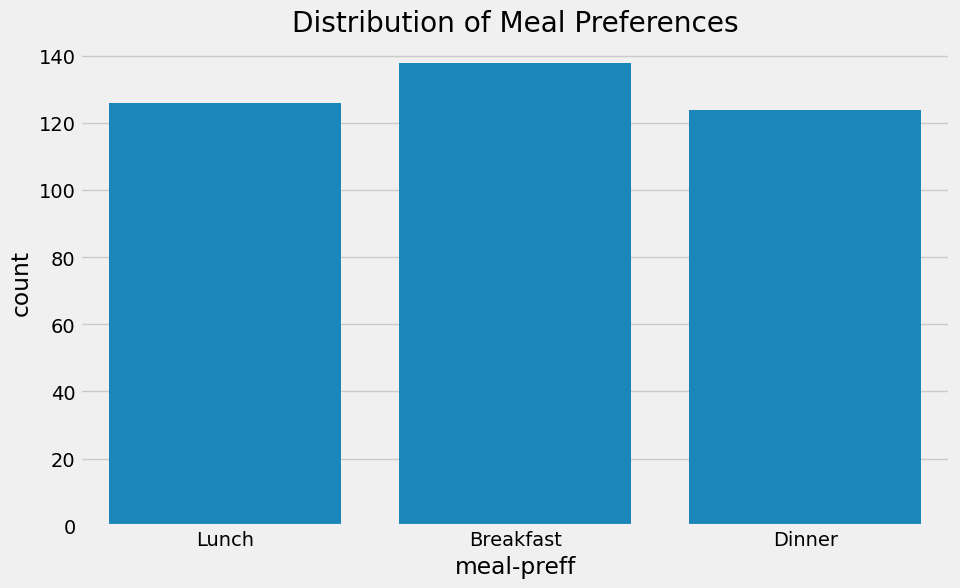

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='meal-preff', data=ppdata)
plt.title('Distribution of Meal Preferences')
plt.show()

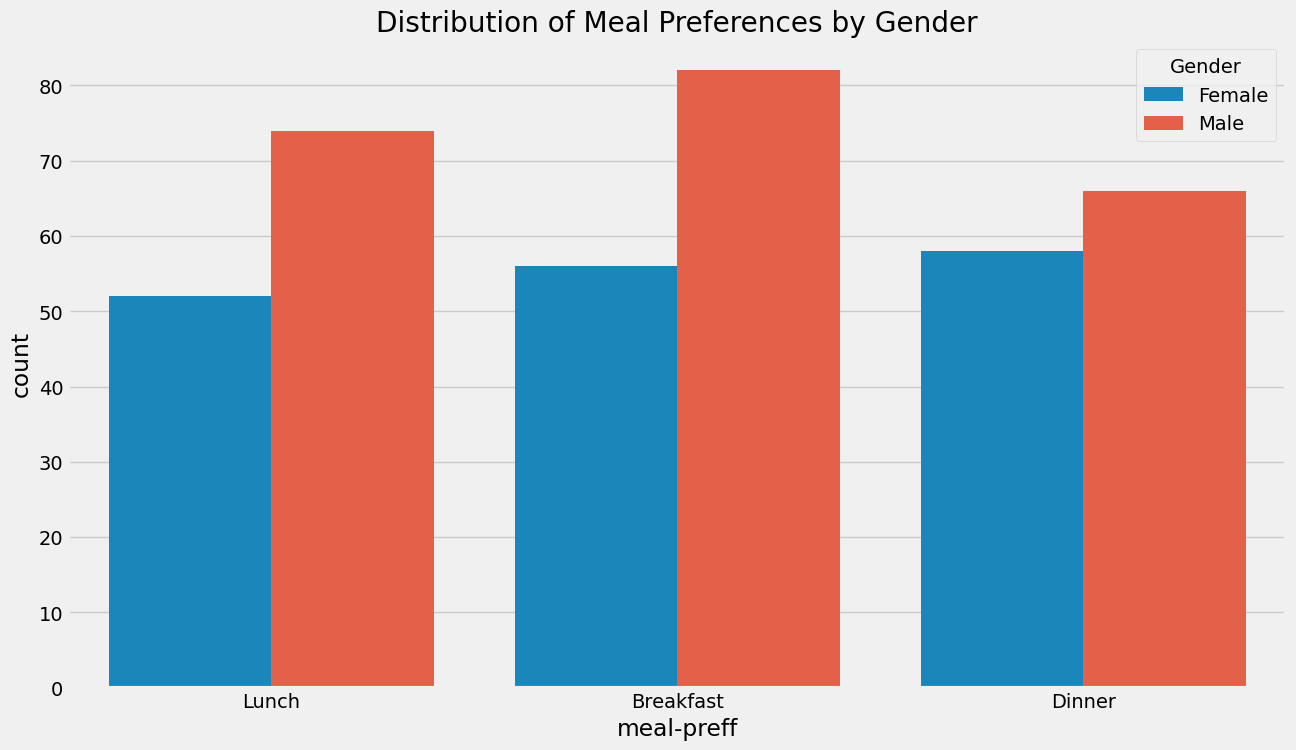

In [21]:
plt.figure(figsize=(14, 8))
sns.countplot(x='meal-preff', hue='Gender', data=ppdata)
plt.title('Distribution of Meal Preferences by Gender')
plt.show()


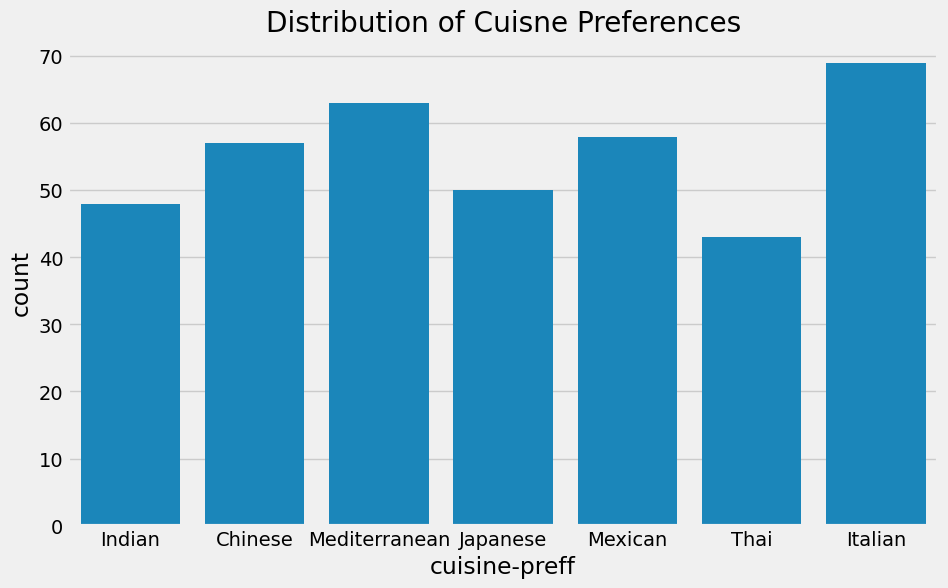

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine-preff', data=ppdata)
plt.title('Distribution of Cuisne Preferences')
plt.show()

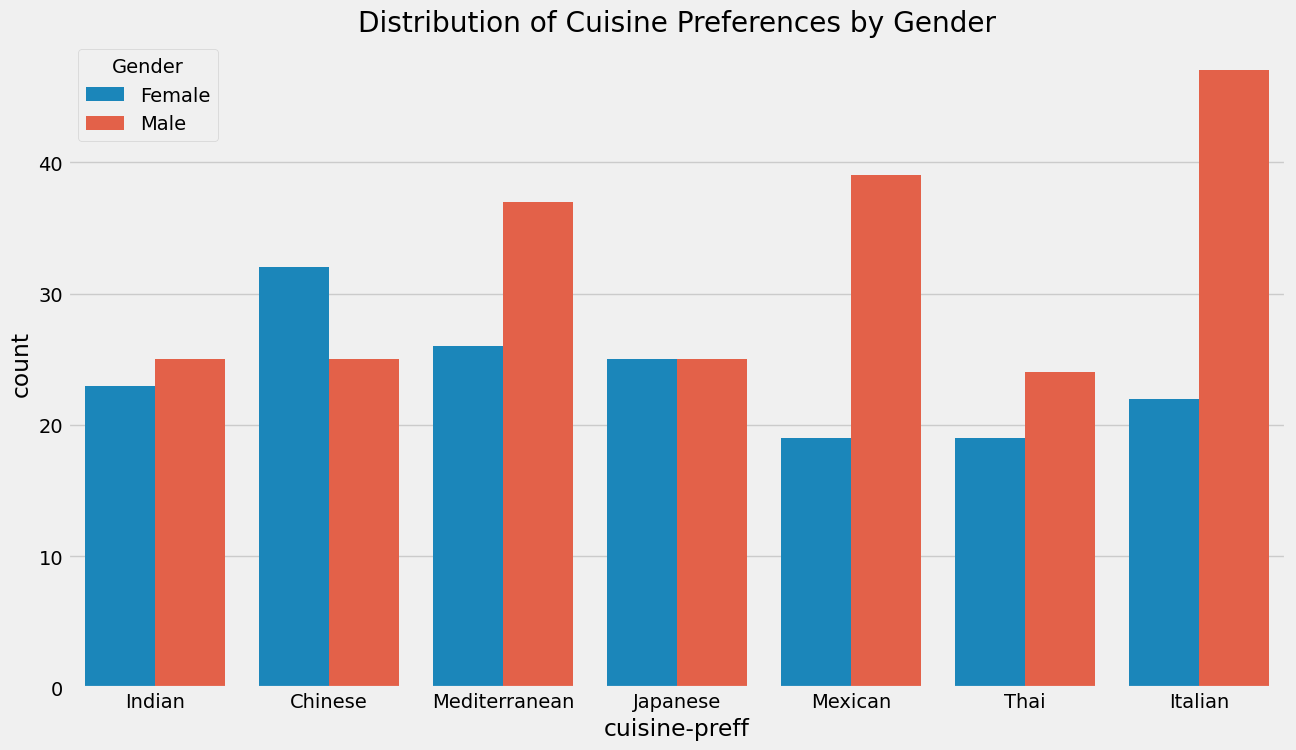

In [24]:
plt.figure(figsize=(14, 8))
sns.countplot(x='cuisine-preff', hue='Gender', data=ppdata)
plt.title('Distribution of Cuisine Preferences by Gender')
plt.show()

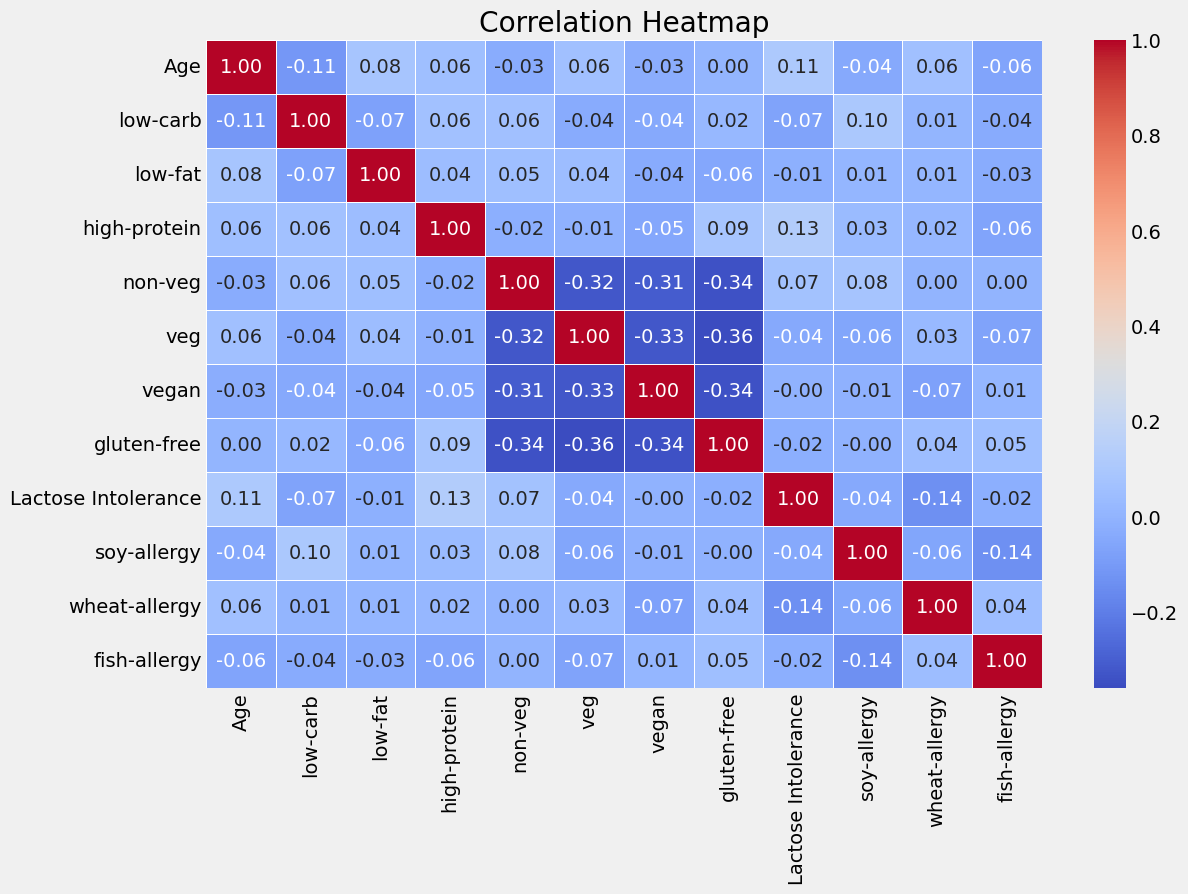

In [22]:
correlation_matrix = ppdata.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


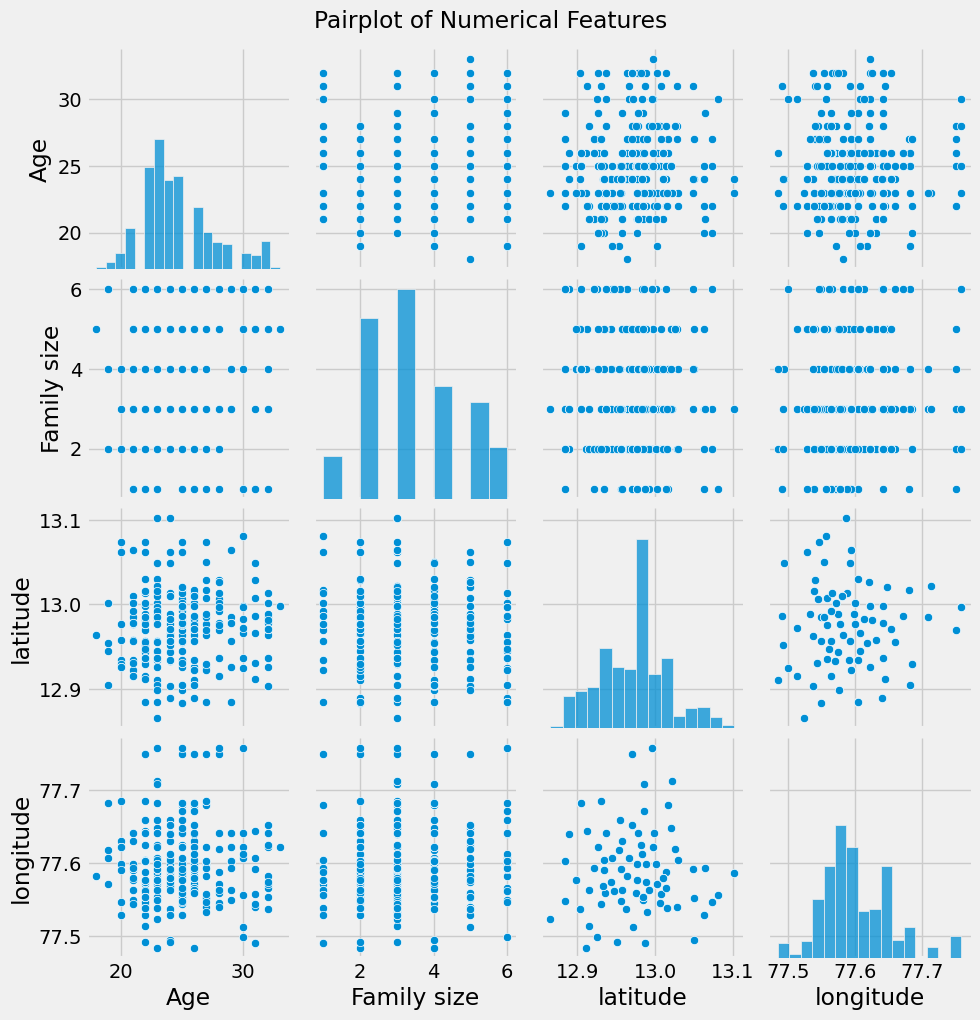

In [ ]:
sns.pairplot(df[['Age', 'Family size', 'latitude', 'longitude']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


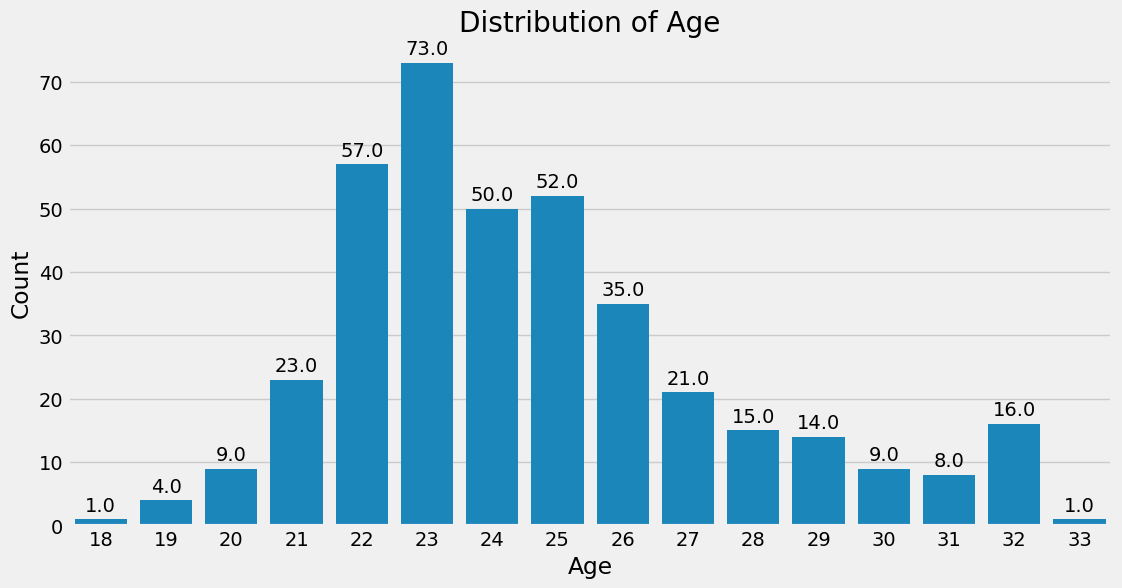

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Age' is a column in your DataFrame (replace df with your actual DataFrame name)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
#Find a relationship between allergies and dataset

In [ ]:
#Find relationship with Food not allowed and dataset.

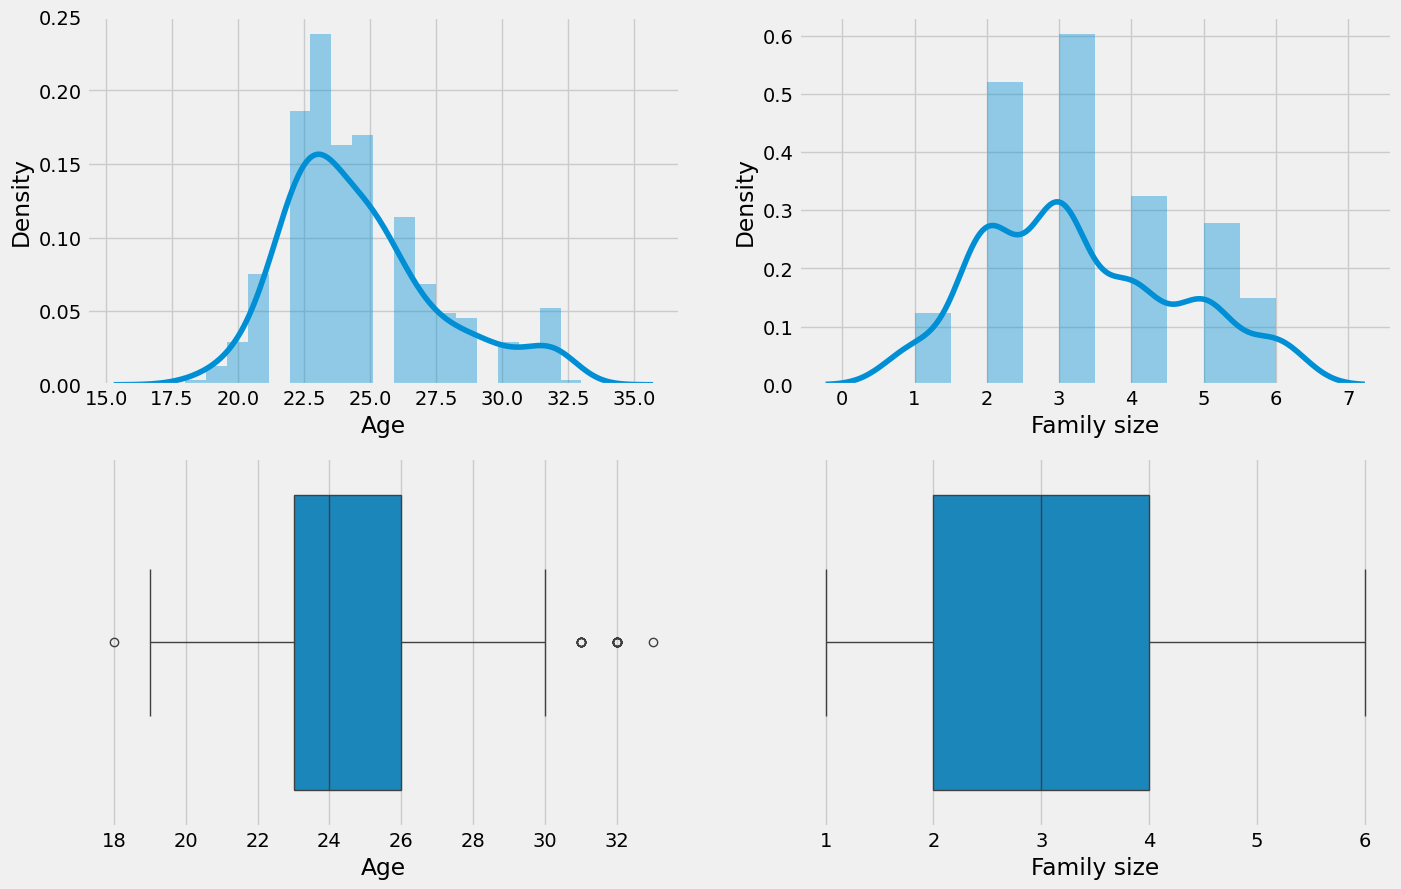

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['Age'])
plt.subplot(2,2,2)
sns.distplot(df['Family size'])
plt.subplot(2,2,3)
sns.boxplot(data=df,x='Age')
plt.subplot(2,2,4)
sns.boxplot(data=df,x='Family size')
plt.show() # Distribution of Age and Family size

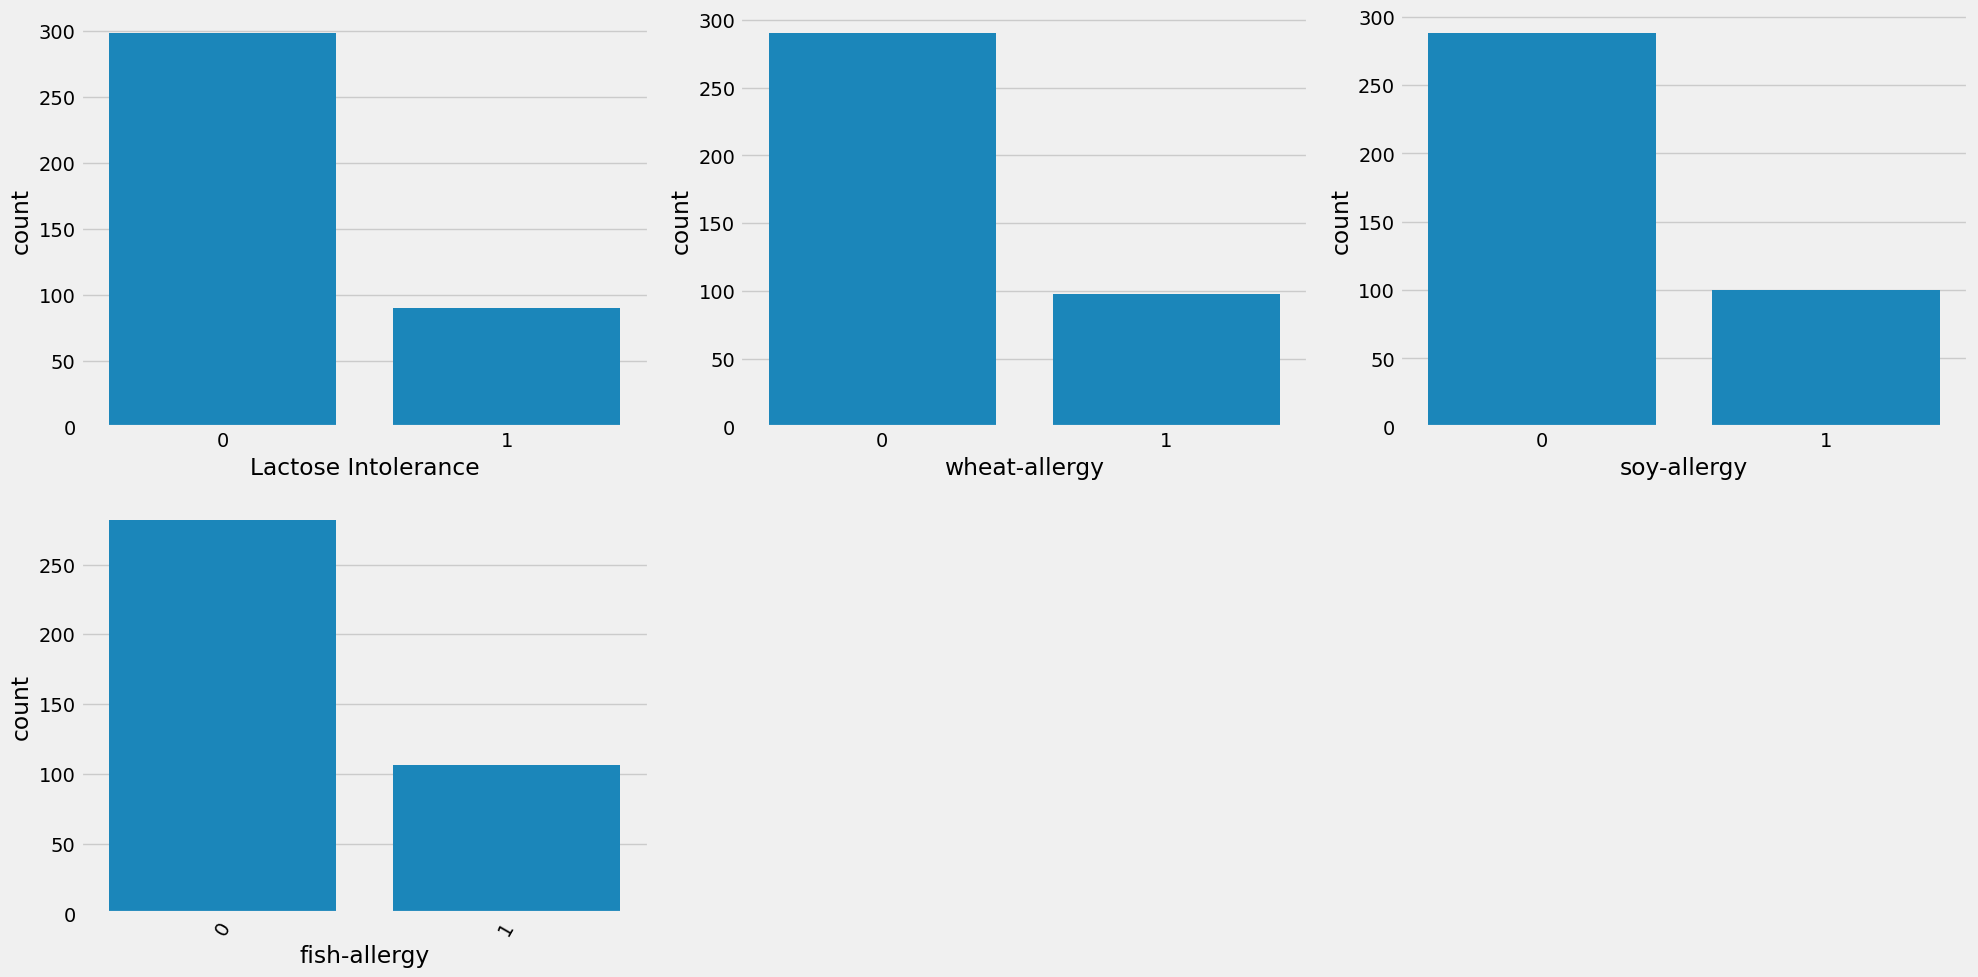

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=ppdata,x='Lactose Intolerance')
plt.subplot(2,3,2)
sns.countplot(data=ppdata,x='wheat-allergy')
plt.subplot(2,3,3)
sns.countplot(data=ppdata,x='soy-allergy')
plt.subplot(2,3,4)
sns.countplot(data=ppdata,x='fish-allergy')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

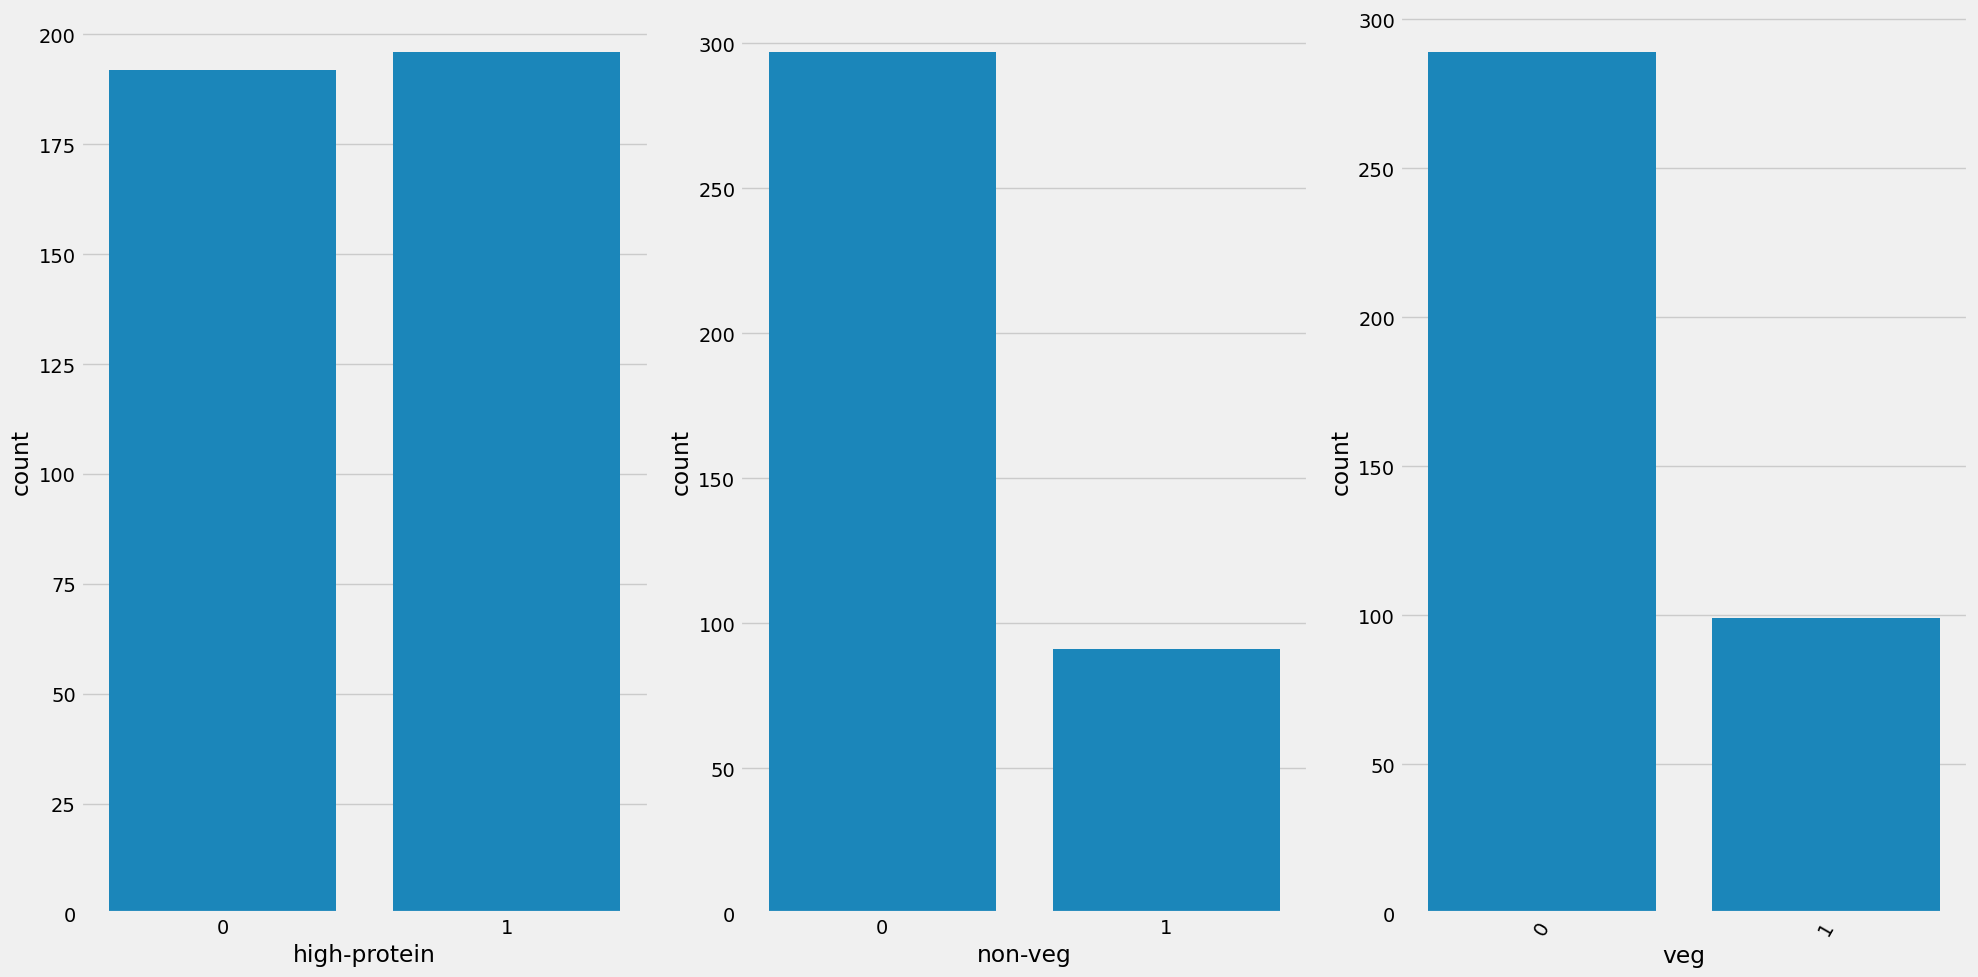

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.countplot(data=ppdata,x='high-protein')
plt.subplot(1,3,2)
sns.countplot(data=ppdata,x='non-veg')
plt.subplot(1,3,3)
sns.countplot(data=ppdata,x='veg')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

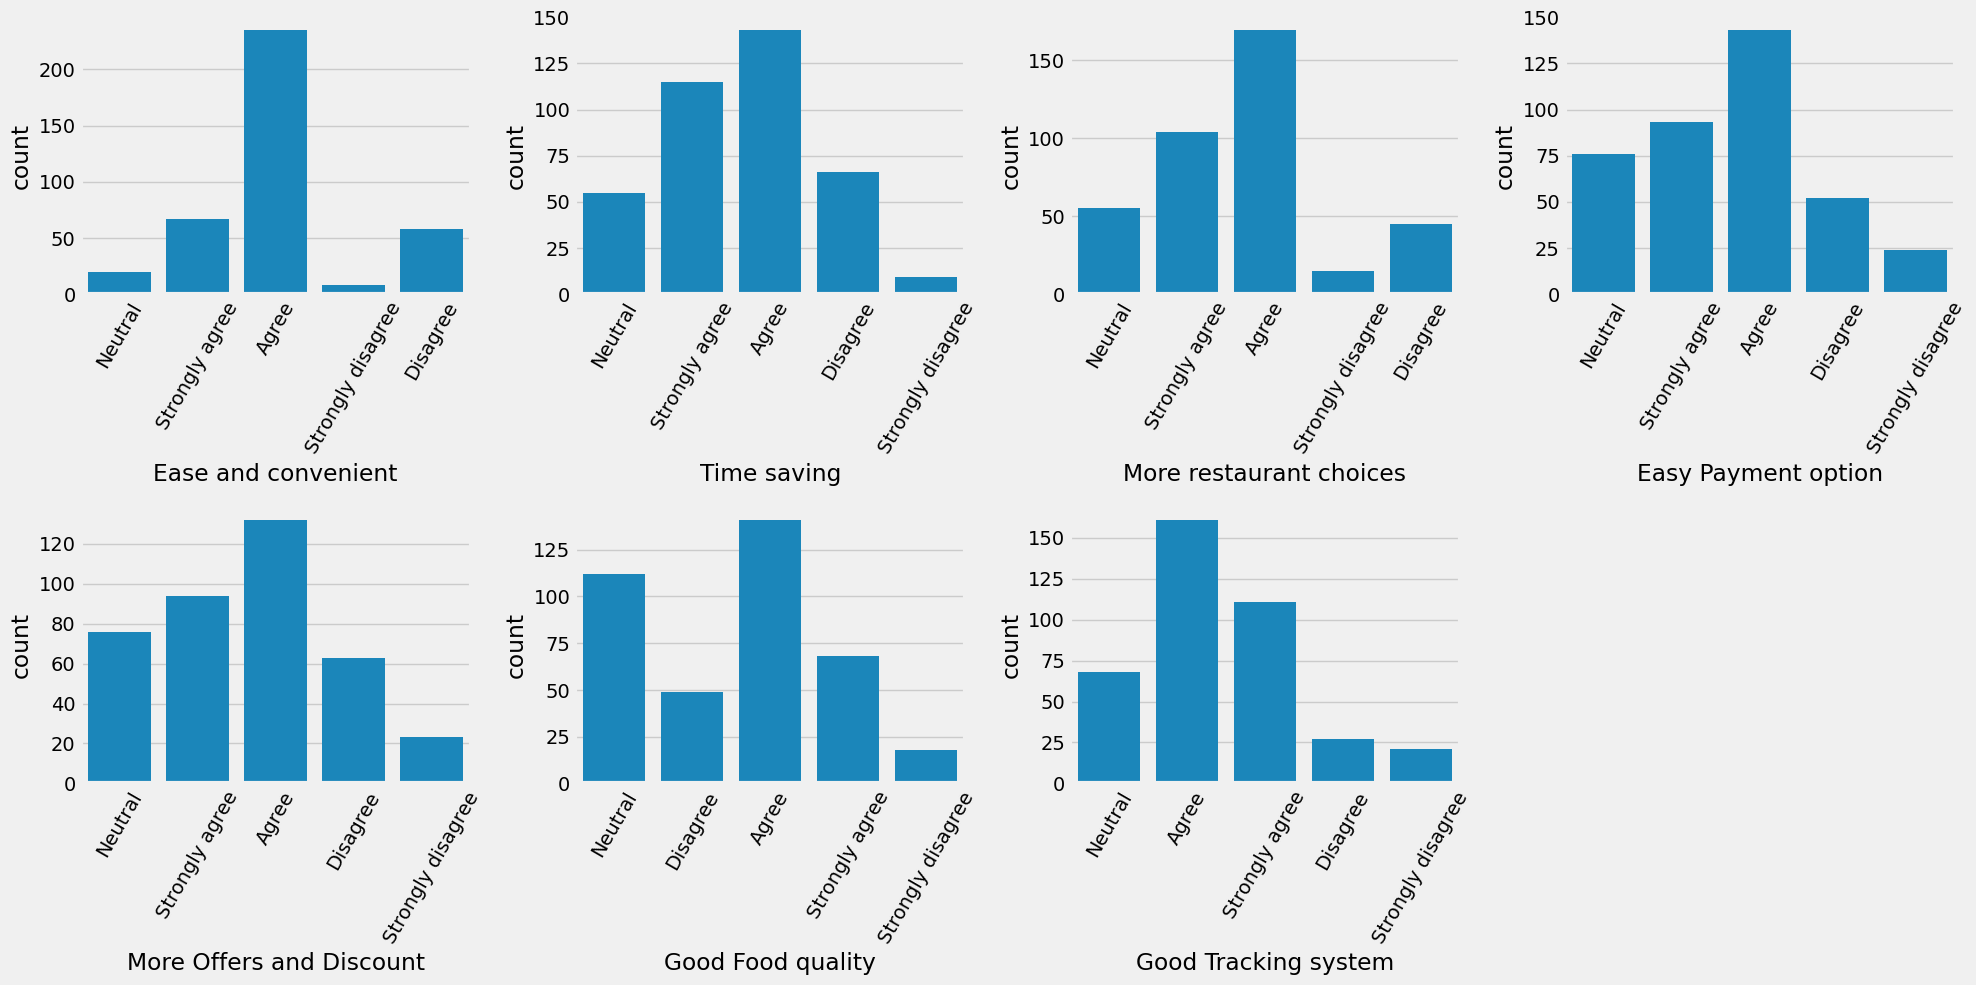

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(data=df,x='Ease and convenient')
plt.xticks(rotation=60)
plt.subplot(2,4,2)
sns.countplot(data=df,x='Time saving')
plt.xticks(rotation=60)
plt.subplot(2,4,3)
sns.countplot(data=df,x='More restaurant choices')
plt.xticks(rotation=60)
plt.subplot(2,4,4)
sns.countplot(data=df,x='Easy Payment option')
plt.xticks(rotation=60)
plt.subplot(2,4,5)
sns.countplot(data=df,x='More Offers and Discount')
plt.xticks(rotation=60)
plt.subplot(2,4,6)
sns.countplot(data=df,x='Good Food quality')
plt.xticks(rotation=60)
plt.subplot(2,4,7)
sns.countplot(data=df,x='Good Tracking system')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

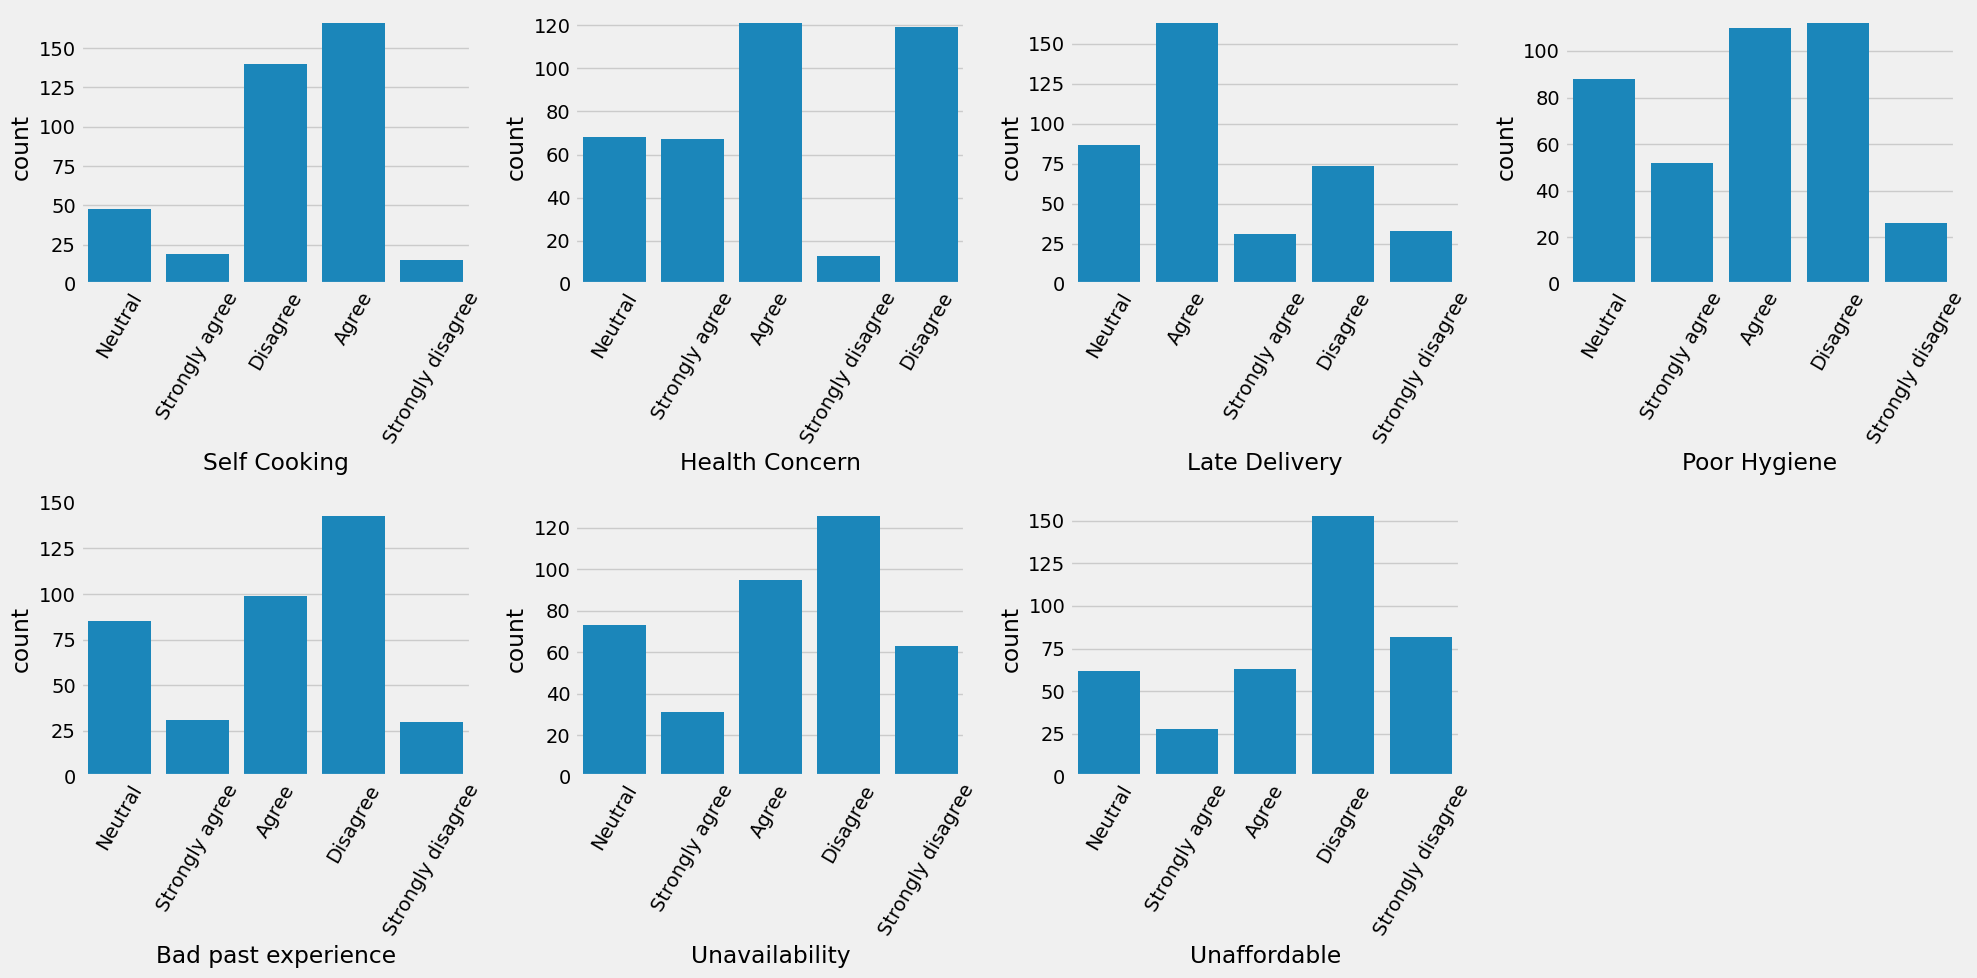

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(data=df,x='Self Cooking')
plt.xticks(rotation=60)
plt.subplot(2,4,2)
sns.countplot(data=df,x='Health Concern')
plt.xticks(rotation=60)
plt.subplot(2,4,3)
sns.countplot(data=df,x='Late Delivery')
plt.xticks(rotation=60)
plt.subplot(2,4,4)
sns.countplot(data=df,x='Poor Hygiene')
plt.xticks(rotation=60)
plt.subplot(2,4,5)
sns.countplot(data=df,x='Bad past experience')
plt.xticks(rotation=60)
plt.subplot(2,4,6)
sns.countplot(data=df,x='Unavailability')
plt.xticks(rotation=60)
plt.subplot(2,4,7)
sns.countplot(data=df,x='Unaffordable')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

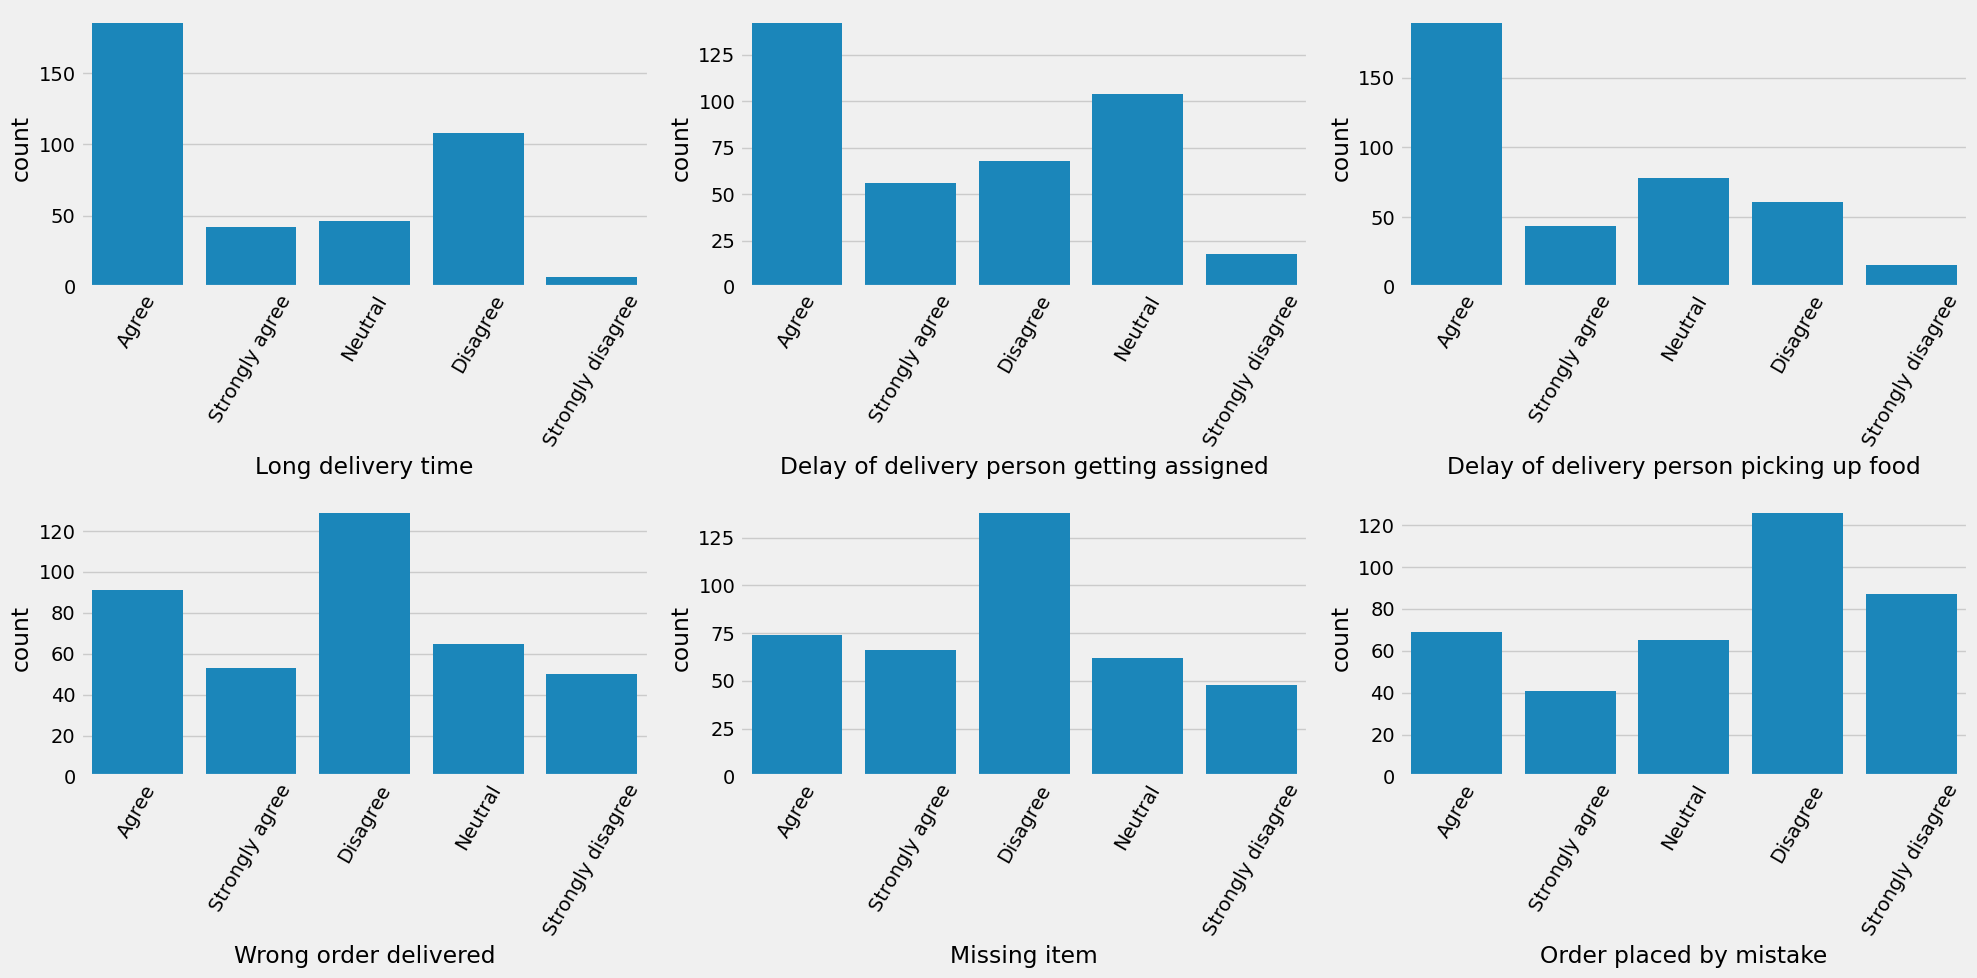

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=df,x='Long delivery time')
plt.xticks(rotation=60)
plt.subplot(2,3,2)
sns.countplot(data=df,x='Delay of delivery person getting assigned')
plt.xticks(rotation=60)
plt.subplot(2,3,3)
sns.countplot(data=df,x='Delay of delivery person picking up food')
plt.xticks(rotation=60)
plt.subplot(2,3,4)
sns.countplot(data=df,x='Wrong order delivered')
plt.xticks(rotation=60)
plt.subplot(2,3,5)
sns.countplot(data=df,x='Missing item')
plt.xticks(rotation=60)
plt.subplot(2,3,6)
sns.countplot(data=df,x='Order placed by mistake')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

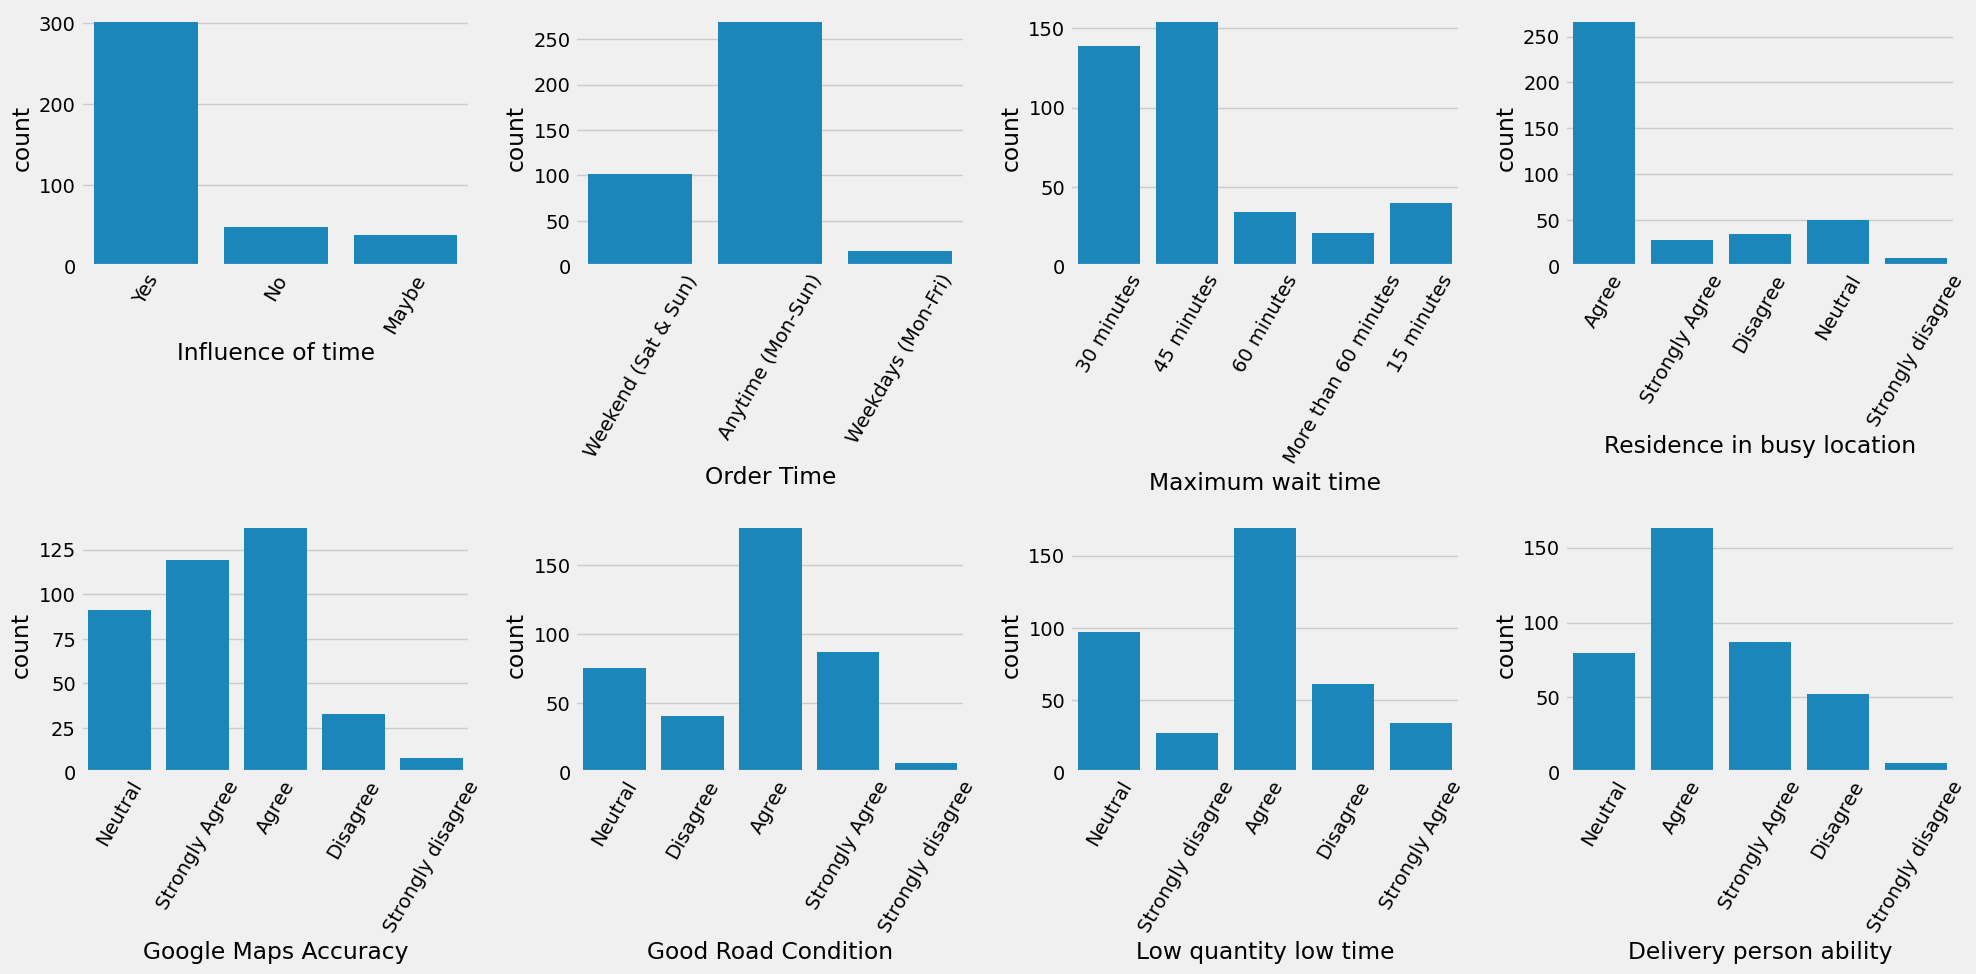

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.countplot(data=df,x='Influence of time')
plt.xticks(rotation=60)
plt.subplot(2,4,2)
sns.countplot(data=df,x='Order Time')
plt.xticks(rotation=60)
plt.subplot(2,4,3)
sns.countplot(data=df,x='Maximum wait time')
plt.xticks(rotation=60)
plt.subplot(2,4,4)
sns.countplot(data=df,x='Residence in busy location')
plt.xticks(rotation=60)
plt.subplot(2,4,5)
sns.countplot(data=df,x='Google Maps Accuracy')
plt.xticks(rotation=60)
plt.subplot(2,4,6)
sns.countplot(data=df,x='Good Road Condition')
plt.xticks(rotation=60)
plt.subplot(2,4,7)
sns.countplot(data=df,x='Low quantity low time')
plt.xticks(rotation=60)
plt.subplot(2,4,8)
sns.countplot(data=df,x='Delivery person ability')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

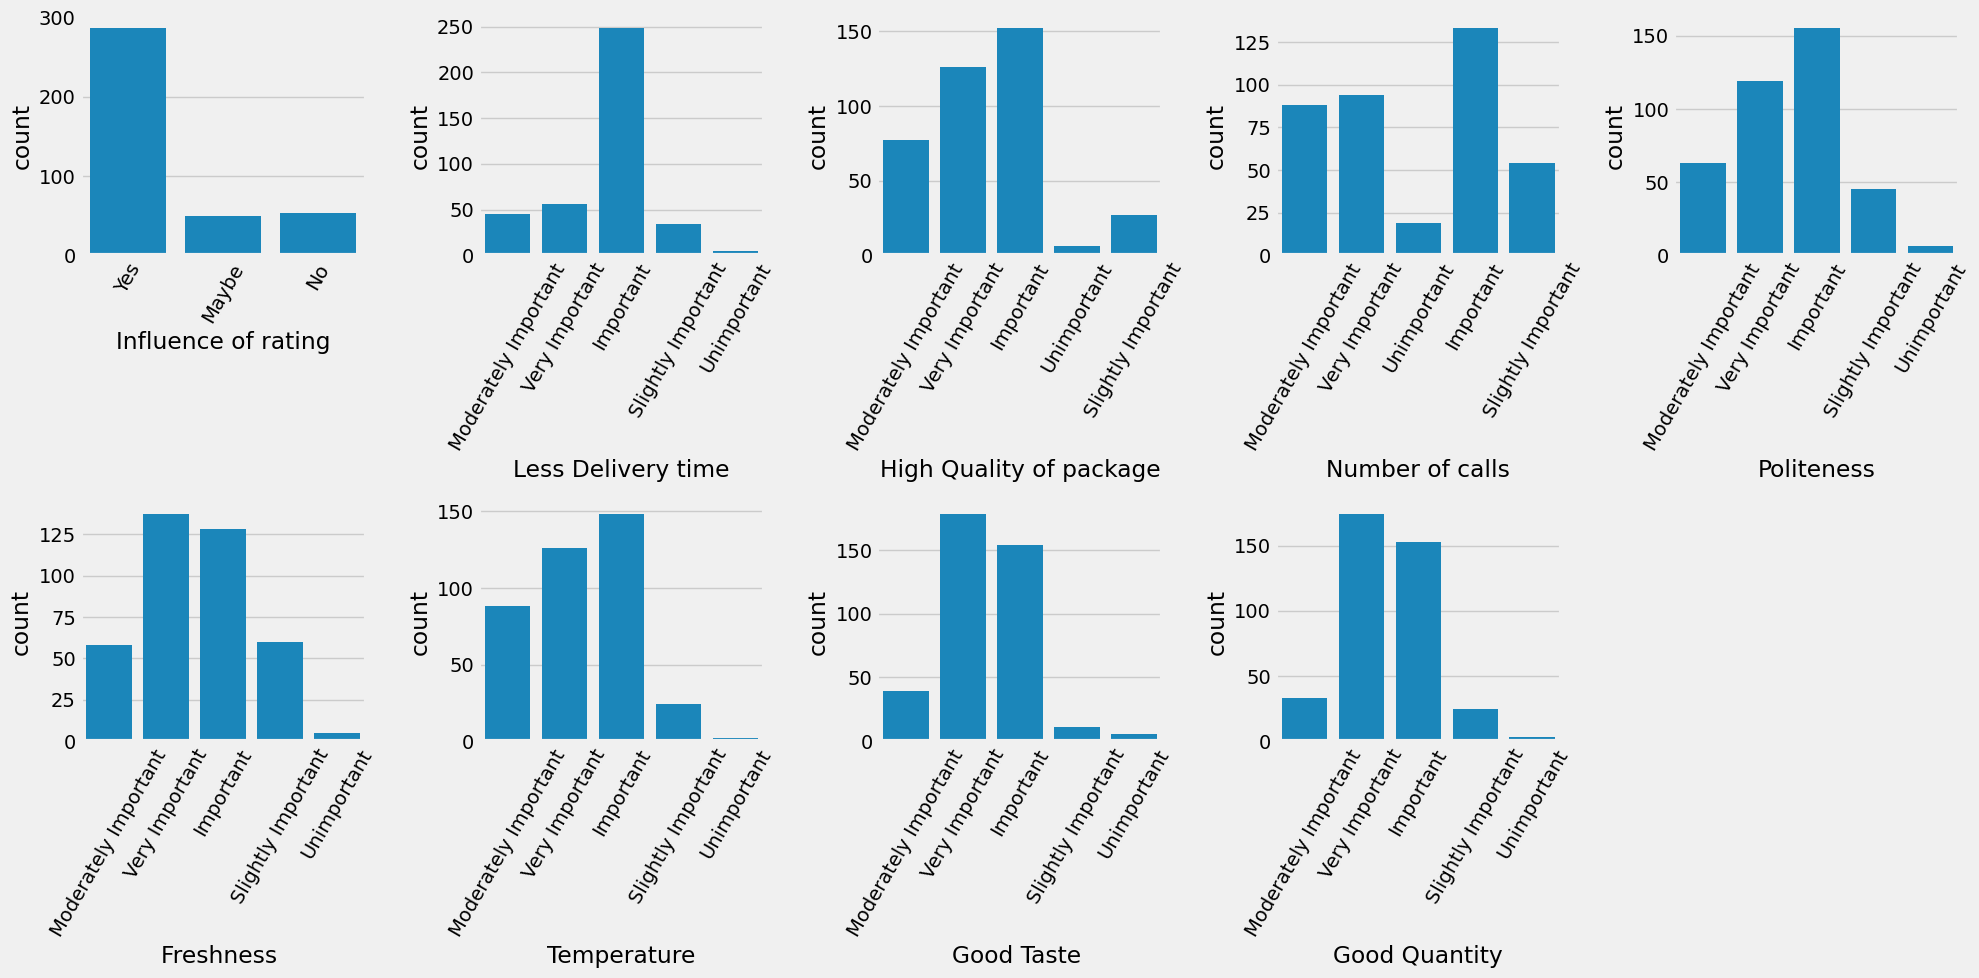

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.countplot(data=df,x='Influence of rating')
plt.xticks(rotation=60)
plt.subplot(2,5,2)
sns.countplot(data=df,x='Less Delivery time')
plt.xticks(rotation=60)
plt.subplot(2,5,3)
sns.countplot(data=df,x='High Quality of package')
plt.xticks(rotation=60)
plt.subplot(2,5,4)
sns.countplot(data=df,x='Number of calls')
plt.xticks(rotation=60)
plt.subplot(2,5,5)
sns.countplot(data=df,x='Politeness')
plt.xticks(rotation=60)
plt.subplot(2,5,6)
sns.countplot(data=df,x='Freshness ')
plt.xticks(rotation=60)
plt.subplot(2,5,7)
sns.countplot(data=df,x='Temperature')
plt.xticks(rotation=60)
plt.subplot(2,5,8)
sns.countplot(data=df,x='Good Taste ')
plt.xticks(rotation=60)
plt.subplot(2,5,9)
sns.countplot(data=df,x='Good Quantity')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

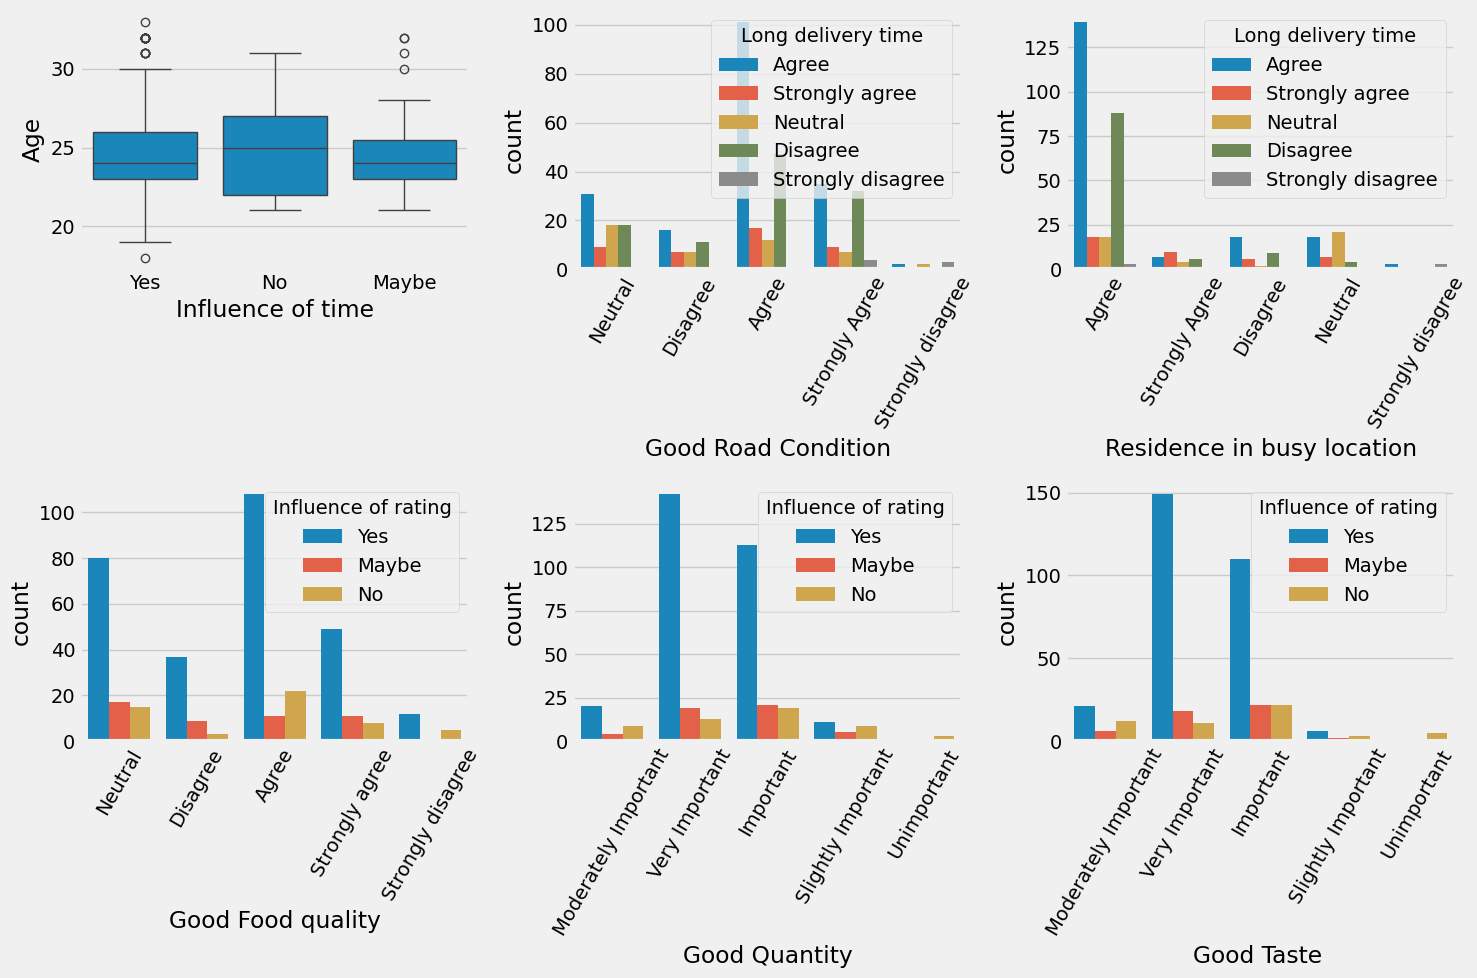

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Influence of time',y='Age')
plt.subplot(2,3,2)
sns.countplot(data=df,x='Good Road Condition',hue='Long delivery time')
plt.xticks(rotation=60)
plt.subplot(2,3,3)
sns.countplot(data=df,x='Residence in busy location',hue='Long delivery time')
plt.xticks(rotation=60)
plt.subplot(2,3,4)
sns.countplot(data=df,x='Good Food quality',hue='Influence of rating')
plt.xticks(rotation=60)
plt.subplot(2,3,5)
sns.countplot(data=df,x='Good Quantity',hue='Influence of rating')
plt.xticks(rotation=60)
plt.subplot(2,3,6)
sns.countplot(data=df,x='Good Taste ',hue='Influence of rating')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

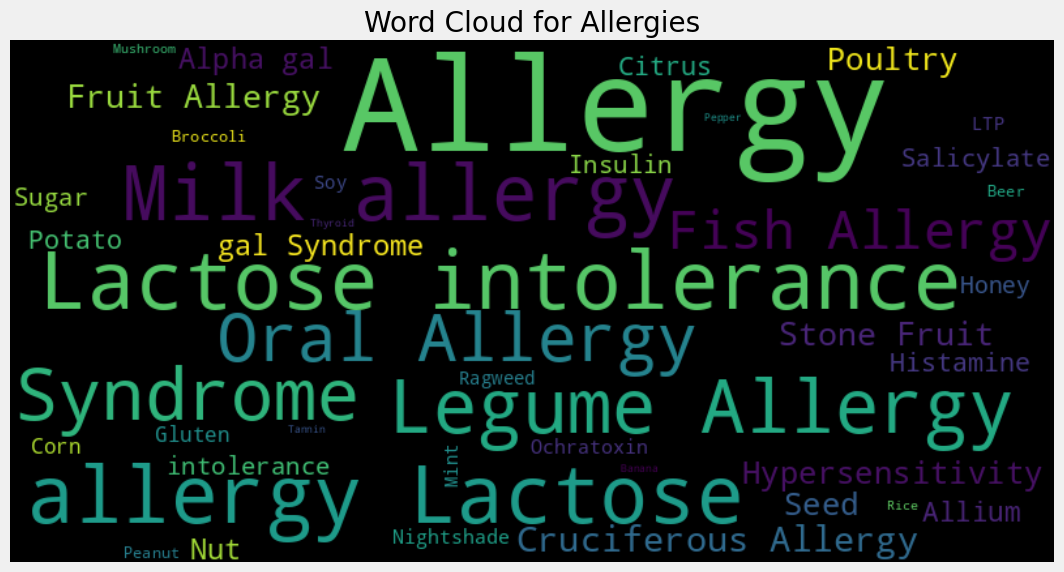

In [ ]:
allergies_text = ' '.join(df['Allergies'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(allergies_text)s

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Allergies')
plt.show()


### Text Aanlysis

In [ ]:
#Creating a copy
df1=df.copy()

#Removing unecessary reviews- Nil value
df1= df[~df['Reviews'].isin(['NIL','nil','Nil','No','Nil\n'])]

# Considering only two columns
df1=df1[['Reviews','Output']]

#Viewing the data
df1

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#Applying the function on reviews column
df1['Reviews']=df1['Reviews'].apply(lambda x:review_cleaning(x))
df1.head()

In [ ]:
#Getting all the stop words
stop= stopwords.words('english')

#Removing the stop words
df1['Reviews'] = df1['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df1.head()

In [ ]:
#Creating new variables
df1['polarity'] = df1['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df1['review_len'] = df1['Reviews'].astype(str).apply(len)
df1['word_count'] = df1['Reviews'].apply(lambda x: len(str(x).split()))

#Viewing the new variables
df1.head()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df1['polarity'])
plt.subplot(1,2,2)
sns.countplot(data=df1,x='Output')

## Data Preprocessing

### Handling Missing Values

In [ ]:
# Drop rows with missing values
ppdata.dropna(inplace=True)

# Alternatively, fill missing values with a specific value
# df.fillna(value, inplace=True)

### Convert Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ppdata['Gender'] = label_encoder.fit_transform(ppdata['Gender'])
ppdata['Marital Status'] = label_encoder.fit_transform(ppdata['Marital Status'])
ppdata['Occupation'] = label_encoder.fit_transform(ppdata['Occupation'])
ppdata['Monthly Income'] = label_encoder.fit_transform(ppdata['Monthly Income'])
ppdata['Educational Qualifications'] = label_encoder.fit_transform(ppdata['Educational Qualifications'])
ppdata['Medium (P1)'] = label_encoder.fit_transform(ppdata['Medium (P1)'])
ppdata['Medium (P2)'] = label_encoder.fit_transform(ppdata['Medium (P2)'])
ppdata['Meal(P1)'] = label_encoder.fit_transform(ppdata['Meal(P1)'])
ppdata['Meal(P2)'] = label_encoder.fit_transform(ppdata['Meal(P2)'])
ppdata['Preference(P1)'] = label_encoder.fit_transform(ppdata['Preference(P1)'])
ppdata['Preference(P2)'] = label_encoder.fit_transform(ppdata['Preference(P2)'])
ppdata['Ease and convenient'] = label_encoder.fit_transform(ppdata['Ease and convenient'])
ppdata['Time saving'] = label_encoder.fit_transform(ppdata['Time saving'])
ppdata['More restaurant choices'] = label_encoder.fit_transform(ppdata['More restaurant choices'])
ppdata['Easy Payment option'] = label_encoder.fit_transform(ppdata['Easy Payment option'])
ppdata['More Offers and Discount'] = label_encoder.fit_transform(ppdata['More Offers and Discount'])
ppdata['Good Food quality'] = label_encoder.fit_transform(ppdata['Good Food quality'])
ppdata['Good Tracking system'] = label_encoder.fit_transform(ppdata['Good Tracking system'])
ppdata['Self Cooking'] = label_encoder.fit_transform(ppdata['Self Cooking'])
ppdata['Health Concern'] = label_encoder.fit_transform(ppdata['Health Concern'])
ppdata['Late Delivery'] = label_encoder.fit_transform(ppdata['Late Delivery'])
ppdata['Poor Hygiene'] = label_encoder.fit_transform(ppdata['Poor Hygiene'])
ppdata['Bad past experience'] = label_encoder.fit_transform(ppdata['Bad past experience'])
ppdata['Unavailability'] = label_encoder.fit_transform(ppdata['Unavailability'])
ppdata['Unaffordable'] = label_encoder.fit_transform(ppdata['Unaffordable'])
ppdata['Long delivery time'] = label_encoder.fit_transform(ppdata['Gender'])
ppdata['Delay of delivery person getting assigned'] = label_encoder.fit_transform(ppdata['Delay of delivery person getting assigned'])
ppdata['Delay of delivery person picking up food'] = label_encoder.fit_transform(ppdata['Delay of delivery person picking up food'])
ppdata['Wrong order delivered'] = label_encoder.fit_transform(ppdata['Wrong order delivered'])
ppdata['Missing item'] = label_encoder.fit_transform(ppdata['Missing item'])
ppdata['Order placed by mistake'] = label_encoder.fit_transform(ppdata['Order placed by mistake'])
ppdata['Influence of time'] = label_encoder.fit_transform(ppdata['Influence of time'])
ppdata['Order Time'] = label_encoder.fit_transform(ppdata['Order Time'])
ppdata['Maximum wait time'] = label_encoder.fit_transform(ppdata['Maximum wait time'])
ppdata['Residence in busy location'] = label_encoder.fit_transform(ppdata['Residence in busy location'])
ppdata['Google Maps Accuracy'] = label_encoder.fit_transform(ppdata['Google Maps Accuracy'])
ppdata['Good Road Condition'] = label_encoder.fit_transform(ppdata['Good Road Condition'])
ppdata['Low quantity low time'] = label_encoder.fit_transform(ppdata['Low quantity low time'])
ppdata['Delivery person ability'] = label_encoder.fit_transform(ppdata['Delivery person ability'])
ppdata['Influence of rating'] = label_encoder.fit_transform(ppdata['Influence of rating'])
ppdata['Less Delivery time'] = label_encoder.fit_transform(ppdata['Less Delivery time'])
ppdata['High Quality of package'] = label_encoder.fit_transform(ppdata['High Quality of package'])
ppdata['Number of Calls'] = label_encoder.fit_transform(ppdata['Number of Calls'])
ppdata['Politeness'] = label_encoder.fit_transform(ppdata['Politeness'])
ppdata['Freshness'] = label_encoder.fit_transform(ppdata['Freshness'])
ppdata['Temperature'] = label_encoder.fit_transform(ppdata['Temperature'])
ppdata['Good Taste'] = label_encoder.fit_transform(ppdata['Good Taste'])
ppdata['Good Quantity'] = label_encoder.fit_transform(ppdata['Good Quantity'])
ppdata['Output'] = label_encoder.fit_transform(ppdata['Output'])
ppdata['Reviews'] = label_encoder.fit_transform(ppdata['Reviews'])
ppdata['Allergies'] = label_encoder.fit_transform(ppdata['Allergies'])
ppdata['Food not allowed'] = label_encoder.fit_transform(ppdata['Food not allowed'])

NameError: name 'ppdata' is not defined

### TeXt data Preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
reviews_tfidf = tfidf_vectorizer.fit_transform(ppdata['Reviews'].fillna(''))


### Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Family size']] = scaler.fit_transform(df[['Age', 'Family size']])
# Repeat this process for other numerical features


### Feature Engineering

In [ ]:
# Example: Combine features to create a new one
df['Total_Cuisine_Preferences'] = df['Perference(P1)'] + df['Perference(P2)']


### Drop Unecessary Columns

In [ ]:
df.drop(['Pin code', 'latitude', 'longitude'], axis=1, inplace=True)


### Define Target Variable

In [ ]:
X = df.drop('Output', axis=1)  # Features
y = df['Output']  # Target variable


### Split the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Text Data Preprocessing (tokenization if needed or possible)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
allergies_tfidf = tfidf_vectorizer.fit_transform(df['Allergies'].fillna(''))

## Build a Similarity Matrix

In [ ]:
similarity_matrix = cosine_similarity(health_features, allergies_tfidf)

## Generate Recommendations

In [ ]:
user_id = 0  # Replace with the actual user ID
user_health_preferences = health_features.iloc[user_id].values.reshape(1, -1)
user_recommendations = similarity_matrix.dot(user_health_preferences.T)

## Filtering Based on Allergies

In [ ]:
user_allergies = df.loc[user_id, 'Allergies']
if user_allergies:
    user_recommendations[user_recommendations <= 0] = 0  # Filter out items with allergens

## Model Evaluation

## Model Deployment